In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../resource/CCGENERAL.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [5]:
missing = df.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [6]:
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [7]:
values = Normalizer().fit_transform(df.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [10]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [13]:
labels = kmeans.labels_
silhouete = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouete)
# Silhoute varia de [-1, 1]

0.3644026320471113


In [14]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)
# Davies_bouldin quanto menor melhor

1.0758234649933394


In [16]:
kalinsk = metrics.calinski_harabasz_score(values, labels)
print(kalinsk)

3431.7843808489874


In [17]:
def clustergin_algoritm(n_cluster, df):
    kmeans = KMeans(n_clusters=n_cluster, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df)
    s = metrics.silhouette_score(df, labels, metric='euclidean')
    dvb = metrics.davies_bouldin_score(df, labels)
    calinski = metrics.calinski_harabasz_score(df, labels)
    return s, dvb, calinski
    

In [18]:
s1, dvb1, calinski1 = clustergin_algoritm(3, values)
print(s1, dvb1, calinski1)

0.3272203126696238 1.3096073640088433 3526.440519908274


In [19]:
s2, dvb2, calinski2 = clustergin_algoritm(5, values)
print(s2, dvb2, calinski2)

0.36450417328686124 1.0757705558830923 3431.8008235317798


In [22]:
s3, dvb3, calinski3 = clustergin_algoritm(50, values)
print(s3, dvb3, calinski3)

0.24489422608255906 1.222759897874257 1609.4322965528252


In [23]:
df.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [25]:
random_data = np.random.rand(8950, 16)
sr, dvbr, calinskir = clustergin_algoritm(5, random_data)
print(sr, dvbr, calinskir)
print(s2, dvb2, calinski2)

0.04038689153407797 3.5038461476340537 305.3536026603095
0.36450417328686124 1.0757705558830923 3431.8008235317798


In [26]:
set1, set2, set3 = np.array_split(values, 3)
s_set1, dvb_set1, cal_set1 = clustergin_algoritm(5, set1)
s_set2, dvb_set2, cal_set2 = clustergin_algoritm(5, set2)
s_set3, dvb_set3, cal_set3 = clustergin_algoritm(5, set3)
print(s_set1, dvb_set1, cal_set1)
print(s_set2, dvb_set2, cal_set2)
print(s_set3, dvb_set3, cal_set3)

0.36867779860135214 1.0591332190701968 1204.0602556232225
0.35416642754504823 1.1382306445993162 1194.9519865048878
0.3670355256183802 1.09937675801675 1167.5313828364538


<function matplotlib.pyplot.show(close=None, block=None)>

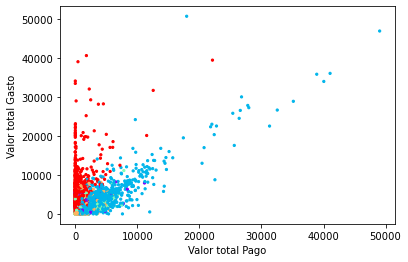

In [29]:
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total Pago')
plt.ylabel('Valor total Gasto')
plt.show

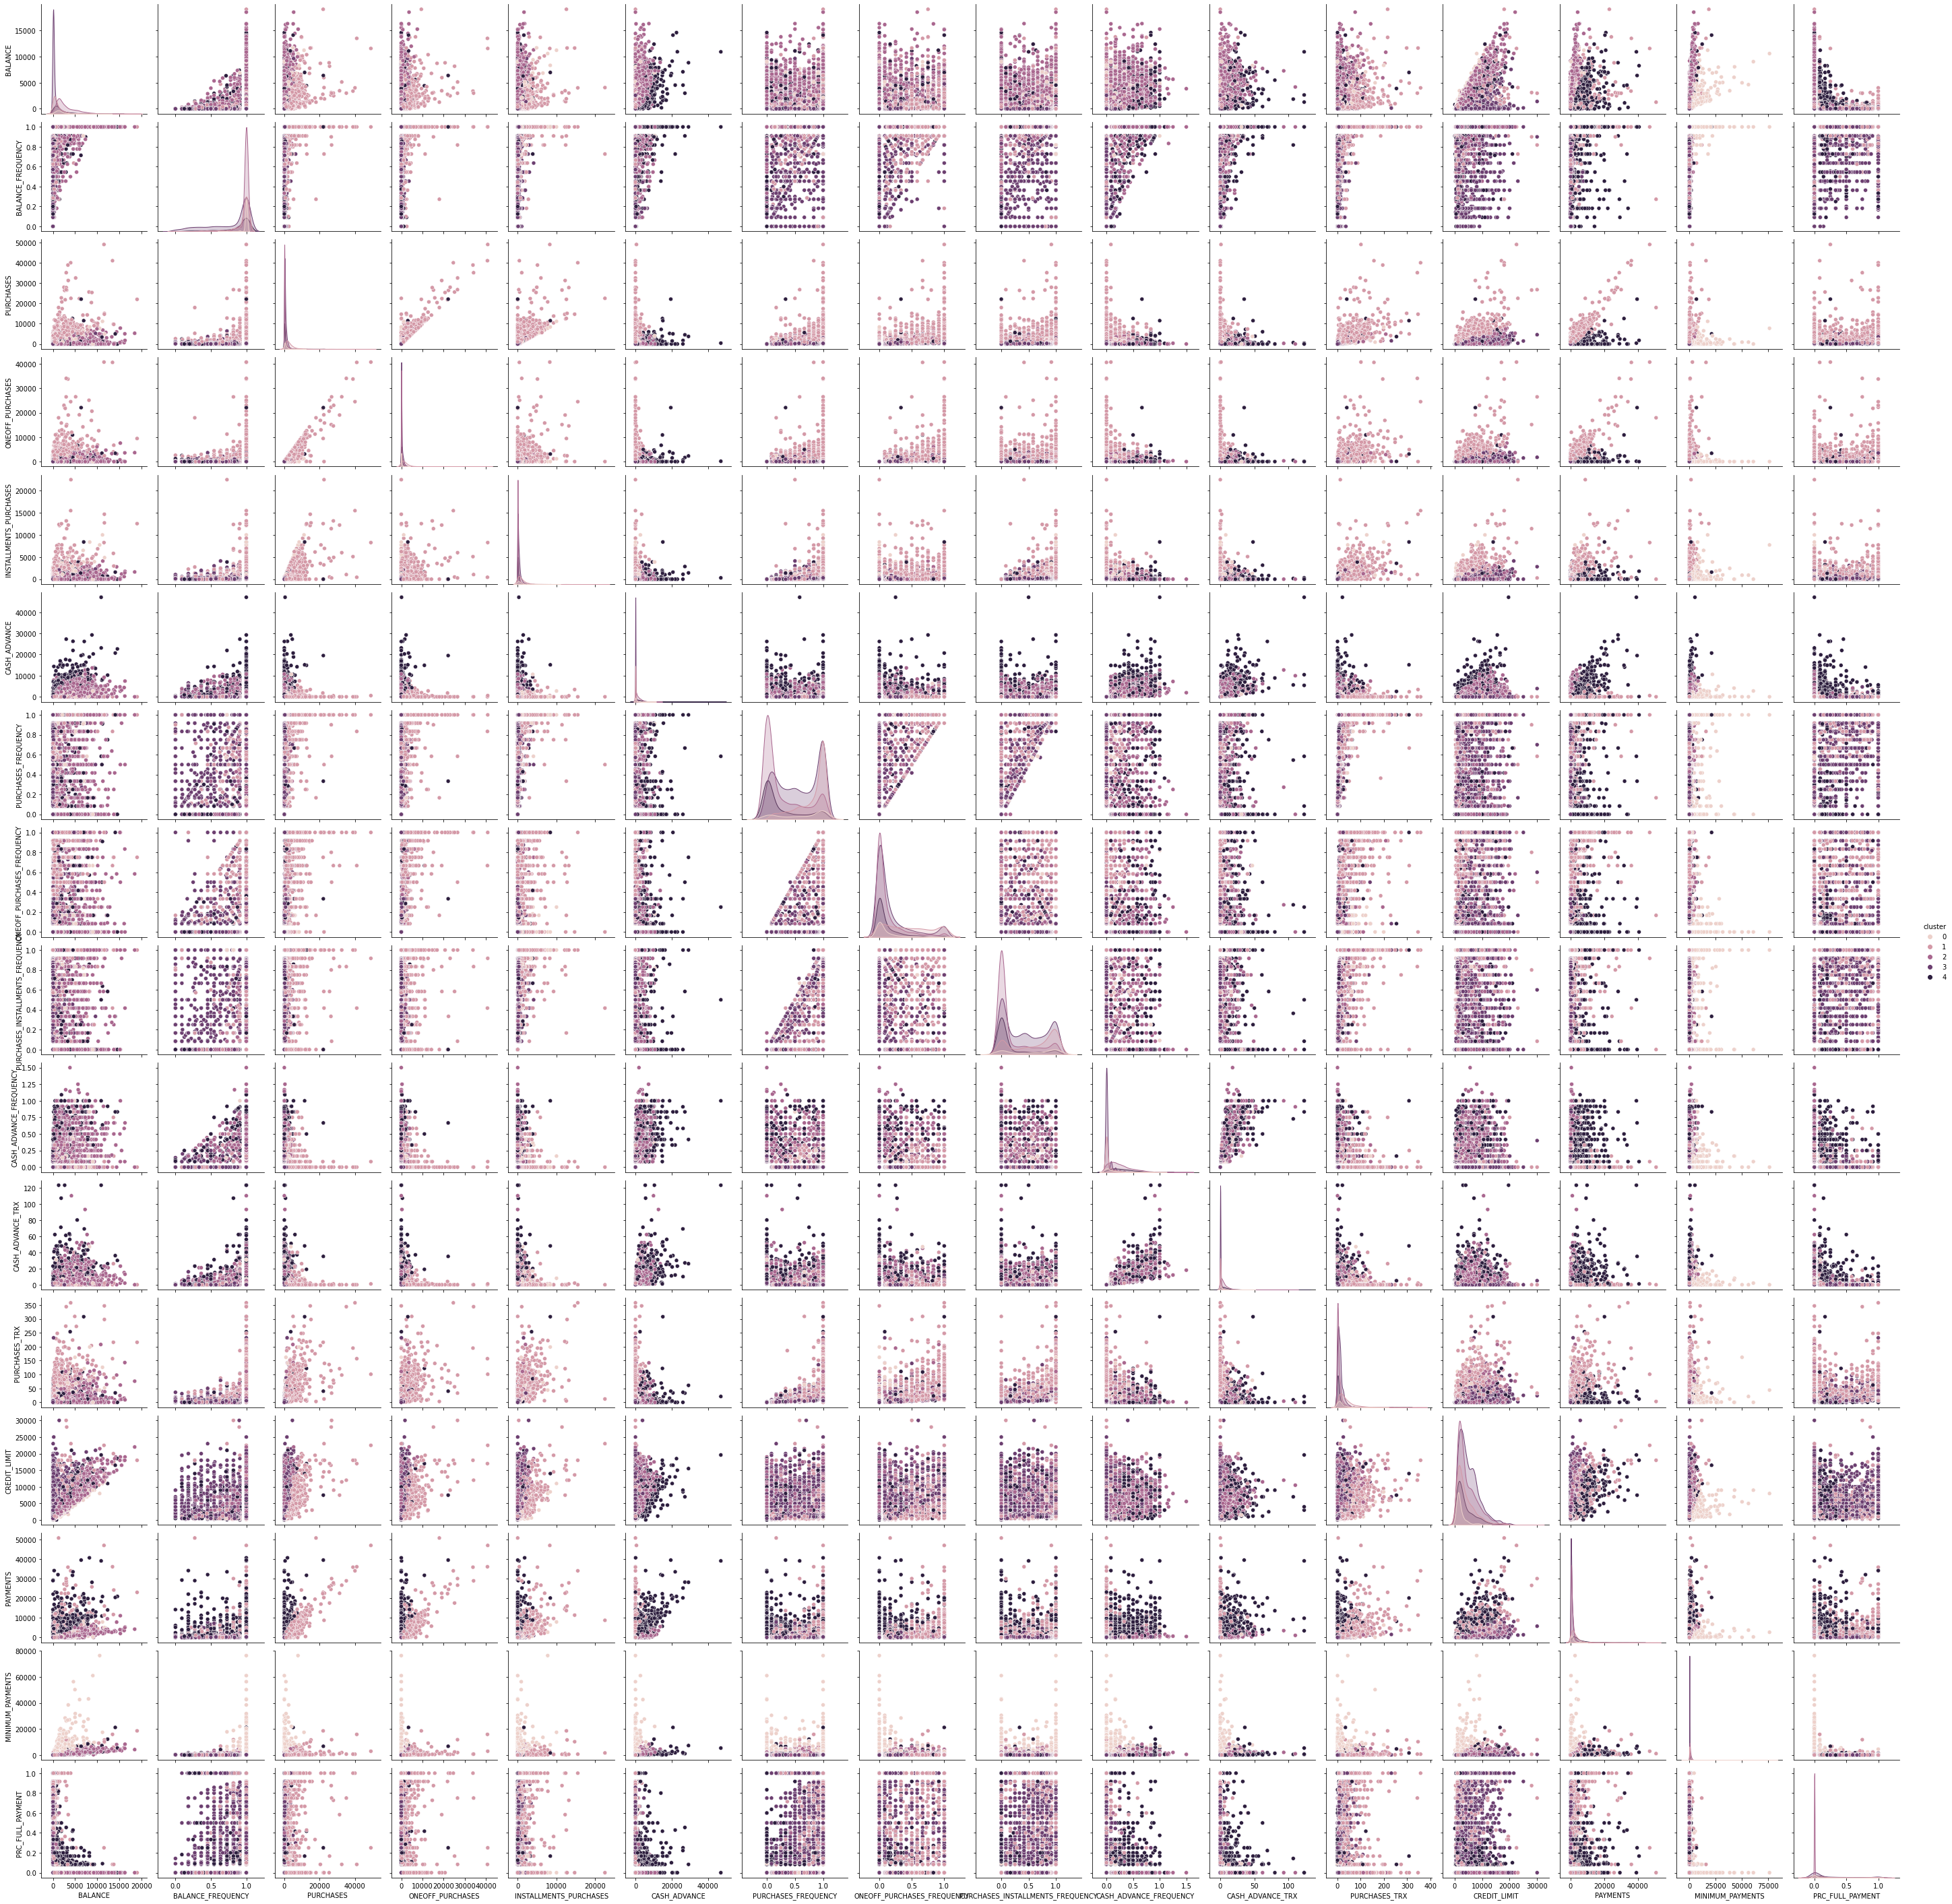

In [31]:
df['cluster'] = labels
sns.pairplot(df[0:], hue='cluster')